In [5]:
import pandas as pd
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [6]:
alternative_types = pd.read_excel("Alternative_asset_type.xls")
bond_holdings = pd.read_excel("Bond_Holdings_Life_Insurance.xls")
bond_yields = pd.read_excel("Bond_Yield_Life_Insurance.xls")
cash_holdings = pd.read_excel("Net_Cash_Invested_assets.xls")
cash_yields = pd.read_excel("Net_Yield_all_investment_Life_Insurance.xls")
other_holdings = pd.read_excel("Other_assets_allocation_insurance_Life_Insurance.xls")
other_yields = pd.read_excel("Gross_Yield_Other_assets_investment_Life_Insurance.xls")

all_data = [alternative_types, bond_holdings, bond_yields, cash_holdings, cash_yields, other_holdings, other_yields]

### Function for merging datasets
- Should work in general for the most part but I deleted the averaged lines from the excel
- I also ignored the SNL group names as they were inconsistent across the different datasets

In [8]:
def clean_allocation_data(df):
    df = df.dropna(how='all')
    df = df.reset_index(drop=True)
    df = df.drop(1)
    
    key_dict = {}
    for i in range(2, len(df)):
        if df.iloc[i,0] in key_dict:
            list1 = list(key_dict[df.iloc[i,0]])
            list1.append(df.iloc[i,1])
            key_dict[df.iloc[i,0]] = tuple(list1)
        else:
            key_dict[df.iloc[i,0]] = (df.iloc[i,1],)
    
    df = df.drop(df.columns[1], axis=1)
    df = df.drop_duplicates()
    name = df.iloc[0,3]
    
    data = []
    for column in range(3, len(df.columns)):
        year = df.iloc[1, column]
        for row in range(2, len(df)):
            entity_name = df.iloc[row, 0]
            investment_key = key_dict[entity_name]
            value = df.iloc[row, column]
            data.append({'year': year,'entity name': entity_name,'investment key': investment_key, name: value})
    result_df = pd.DataFrame(data)
    result_df = result_df.set_index(['year', 'entity name', 'investment key'])
    return result_df

In [9]:
bond_holdings_cleaned = clean_allocation_data(bond_holdings)
bond_yields_cleaned = clean_allocation_data(bond_yields)
cash_holdings_cleaned = clean_allocation_data(cash_holdings)
cash_yields_cleaned = clean_allocation_data(cash_yields)
other_holdings_cleaned = clean_allocation_data(other_holdings)
other_yields_cleaned = clean_allocation_data(other_yields)
print(other_yields_cleaned)

                                                                                        Gross Yield: All Other Inv. Assets\r\n(%)
year   entity name                   investment key                                                                              
2023 Y 5 Star Life Insurance Co.     (0639167E-270D-4EF0-8496-26EE452ED575, 0B032D32...                                  7.360848
       AAA Life Insurance Co.        (11545B7A-2F3C-466D-B6F7-474D270C9261, 20649322...                                  2.476596
       Accordia Life & Annuity Co.   (00DE8FFF-0D55-4C2C-B04C-BF506DD0785E, 043E670E...                                  1.539351
       Advance Ins Co. of Kansas     (291ADA95-72A5-4415-9338-35E1496DF41A, F0308A69...                                   6.45919
       American Family Life Ins Co.  (0C33D8B8-27C0-46C2-94EA-9450A54A51E6, 0FCC5C81...                                119.010183
...                                                                                       

### Merged dataframe
- I printed the merged and cleaned dataframe here, I didn't actually write a function for merging the data but I think this could be pretty straightforward to do if required
- The dataframe is just way to big and does not fit

In [11]:
merged = bond_holdings_cleaned.join([bond_yields_cleaned, cash_holdings_cleaned, cash_yields_cleaned, other_holdings_cleaned, \
other_yields_cleaned], how = "inner")
print(merged)

                                                                                         Bonds/ Unaffiliated Invstmts\r\n(%)  \
year   entity name                   investment key                                                                            
2023 Y 5 Star Life Insurance Co.     (0639167E-270D-4EF0-8496-26EE452ED575, 0B032D32...                            96.290382   
                                     (0639167E-270D-4EF0-8496-26EE452ED575, 0B032D32...                            96.290382   
       AAA Life Insurance Co.        (11545B7A-2F3C-466D-B6F7-474D270C9261, 20649322...                            95.202552   
                                     (11545B7A-2F3C-466D-B6F7-474D270C9261, 20649322...                            95.202552   
       Accordia Life & Annuity Co.   (00DE8FFF-0D55-4C2C-B04C-BF506DD0785E, 043E670E...                            72.747497   
...                                                                                                     

### Investment in Asset Types
- Tabulates the number of investments in each alternative asset type that companies have investments in every year

In [35]:
def tabulate(df):
    df = df.dropna(how='all')
    df = df.drop(df.columns[[0, 1, 2, 3, 4]], axis=1)
    df = df.drop([1,2])
    df = df.reset_index(drop=True)
    
    year_list = df.iloc[0].tolist()
    df_data = {}
    for year in year_list:
        df_data[year] = {}
    
    #create dictionary for different asset types
    for column_index in range(0, len(df.columns)):
        year = df.iloc[0, column_index]
        for row_index in range(1, len(df)):
            value = df.iloc[row_index, column_index]
            if pd.isna(value) == True:
                continue
            elif value not in df_data[year]:
                df_data[year][value] = 1
            else:
                df_data[year][value] += 1  
    df = pd.DataFrame.from_dict(df_data)
            
    return df

In [37]:
alternative_types = pd.read_excel("Alternative_asset_type.xls")
alternative_types_tabulated = tabulate(alternative_types)
print(alternative_types_tabulated)

                                                    2023 Y  2022 Y  2021 Y  \
Surplus Debentures                                   365.0   365.0   354.0   
Other Assets                                          49.0    43.0    44.0   
Long-term Bond, Issuer Obligations                    47.0    57.0    51.0   
Joint Venture, LLCs: Common Stock                   2482.0  2420.0  2347.0   
Residual Tranches: Other                              41.0    37.0     NaN   
Residual Tranches: Fixed Income                      104.0    70.0     NaN   
Joint Venture, LLCs: Real Estate                     334.0   328.0   327.0   
Non-Guaranteed State Low-Income Housing Tax Credit    24.0    19.0    11.0   
Common Stock                                           1.0     NaN     NaN   
Joint Venture, LLCs: Other                           449.0   437.0   435.0   
Nonguaranteed Federal Low-Income Housing Tax Cr...   170.0   172.0   163.0   
Residual Tranches: Common Stock                        7.0     N

In [15]:
import matplotlib.pyplot as plt

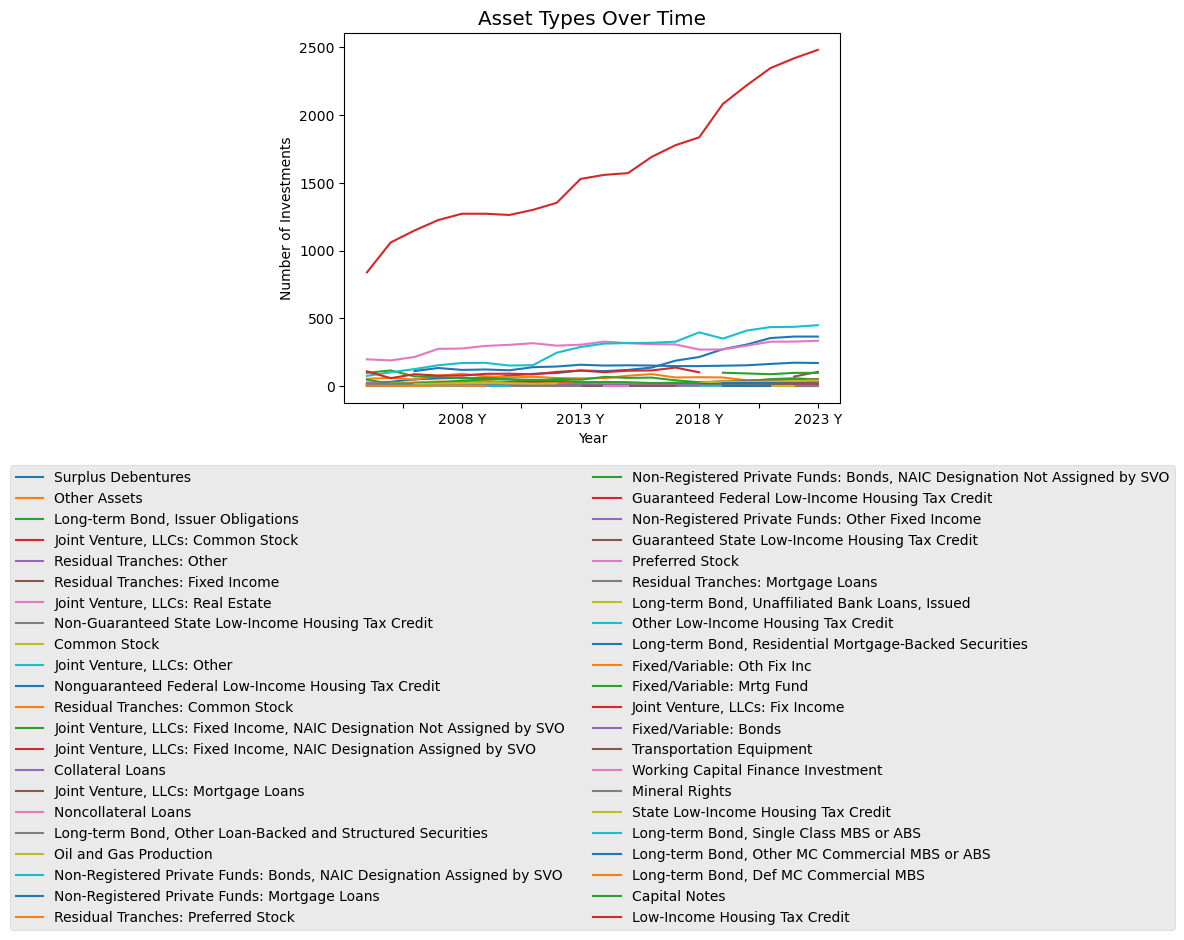

In [39]:
alternative_types_tabulated_T = alternative_types_tabulated.T.iloc[::-1]
alternative_types_tabulated_T.plot()
plt.style.use('ggplot')
plt.title("Asset Types Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Investments")
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)
#plt.savefig("asset_types.png")
plt.show()

### Yields in Different Assets Over Time
- Shows the yields of bonds and alternative assets over time

In [47]:
import numpy as np
def average(df):
    df = df.dropna(how='all')
    df = df.drop(df.columns[[0, 1, 2, 3]], axis=1)
    df = df.drop([1,2])
    df = df.reset_index(drop=True)
    df = df.drop_duplicates()
    
    year_list = df.iloc[0].tolist()
    df_data = {}
    for year in year_list:
        df_data[year] = {} 

    for column_index in range(0, len(df.columns)):
        year = df.iloc[0, column_index]
        df.iloc[1:, column_index] = pd.to_numeric(df.iloc[1:, column_index], errors='coerce')
        column_mean = df.iloc[1:, column_index].mean()
        column_mean = float(column_mean)
        df_data[year]['mean'] = column_mean
        
    df = pd.DataFrame.from_dict(df_data)
    return df

def median(df):
    df = df.dropna(how='all')
    df = df.drop(df.columns[[0, 1, 2, 3]], axis=1)
    df = df.drop([1,2])
    df = df.reset_index(drop=True)
    df = df.drop_duplicates()
    
    year_list = df.iloc[0].tolist()
    df_data = {}
    for year in year_list:
        df_data[year] = {} 

    for column_index in range(0, len(df.columns)):
        year = df.iloc[0, column_index]
        df.iloc[1:, column_index] = pd.to_numeric(df.iloc[1:, column_index], errors='coerce')
        column_median = df.iloc[1:, column_index].median()
        column_median = float(column_median)
        df_data[year]['median'] = column_median
        
    df = pd.DataFrame.from_dict(df_data)
    return df

In [67]:
bond_yields_average = average(bond_yields)
bond_yields_median = median(bond_yields)
print(bond_yields_median)
print(bond_yields)
other_yields_average = average(other_yields)
other_yields_median = median(other_yields)

          2023 Y    2022 Y    2021 Y    2020 Y    2019 Y    2018 Y    2017 Y  \
median  4.369685  3.991868  3.994405  4.064618  4.313322  4.305804  4.388415   

          2016 Y    2015 Y    2014 Y  ...    2012 Y    2011 Y    2010 Y  \
median  4.508987  4.584358  4.783039  ...  5.050166  5.318528  5.574395   

          2009 Y    2008 Y    2007 Y   2006 Y    2005 Y    2004 Y    2003 Y  
median  5.727475  5.731441  5.664029  5.54877  5.530266  5.724104  6.062038  

[1 rows x 21 columns]
                         Unnamed: 0                            Unnamed: 1  \
0                               NaN                                   NaN   
1                       Entity Name                Company Investment Key   
2                       ENTITY_NAME                    COMPANY_INVEST_KEY   
3                               NaN                                   NaN   
4                               NaN                                   NaN   
...                             ...            

In [69]:
bond_yields_average_T = bond_yields_average.T.iloc[::-1]
bond_yields_median_T = bond_yields_median.T.iloc[::-1]
other_yields_average_T = other_yields_average.T.iloc[::-1]
other_yields_median_T = other_yields_median.T.iloc[::-1]

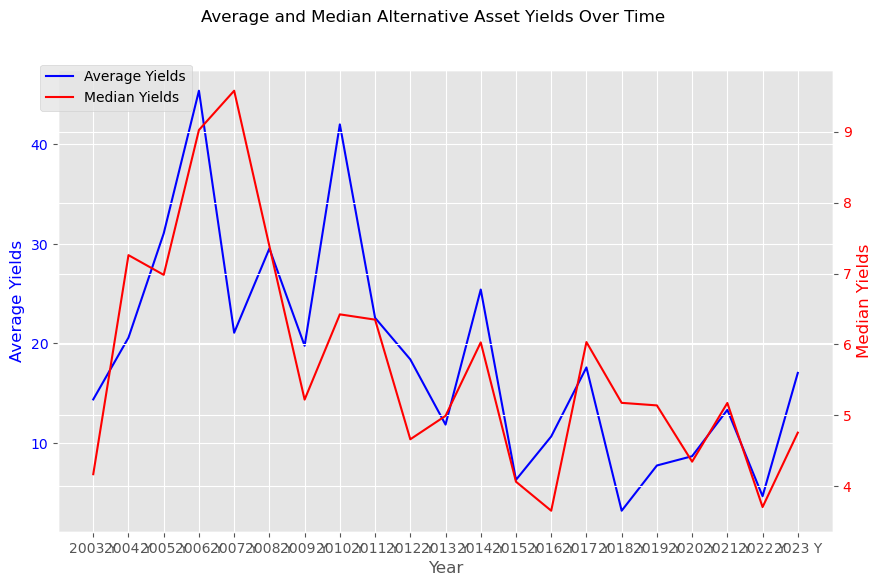

In [75]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(other_yields_average_T.index, other_yields_average_T.values, label='Average Yields', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Yields', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for median yields
ax2 = ax1.twinx()
ax2.plot(other_yields_median_T.index, other_yields_median_T.values, label='Median Yields', color='red')
ax2.set_ylabel('Median Yields', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
fig.suptitle('Average and Median Alternative Asset Yields Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.savefig("alternative_yields.png")
plt.show()

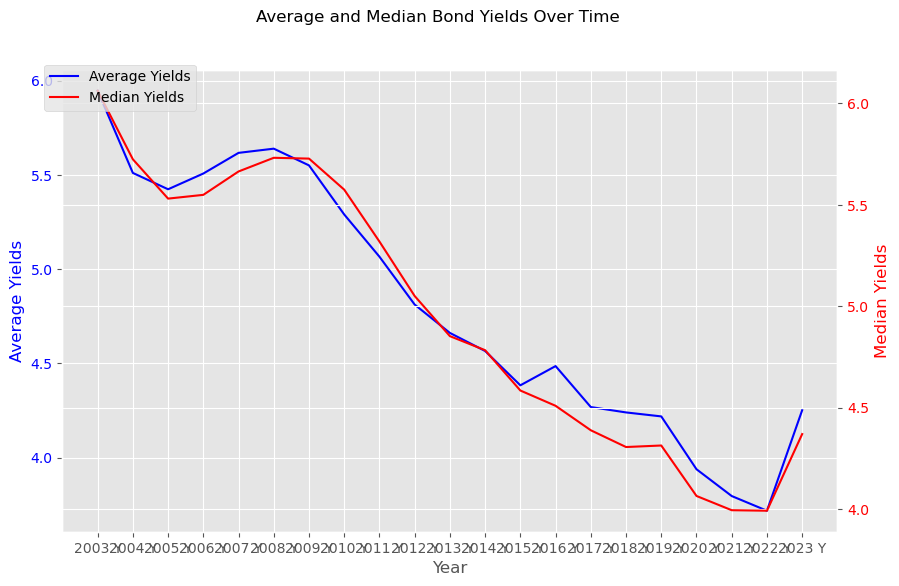

In [77]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(bond_yields_average_T.index, bond_yields_average_T.values, label='Average Yields', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Yields', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for median yields
ax2 = ax1.twinx()
ax2.plot(bond_yields_median_T.index, bond_yields_median_T.values, label='Median Yields', color='red')
ax2.set_ylabel('Median Yields', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
fig.suptitle('Average and Median Bond Yields Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.savefig("bond_yields.png")
plt.show()